In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('Rapsodo 2-4-21-.xlsx')

In [26]:
def clean_na(df):
    "drops columns and rows with more than 5 NaN"
    return df.dropna(thresh=5).dropna(thresh=5, axis=1)

In [28]:
df = clean_na(df)

In [72]:
# take the spin_direction column and create a new dataframe with hour and minute in seperate columns
spin_df = pd.DataFrame(df.spin_direction.str.split(":").to_list(), columns=['hour_str', 'min_str'])

# parse the hours and minutes and convert to minutes
spin_df["hour_minutes"] = spin_df['hour_str'].str.replace('h','').astype(int) * 60
spin_df["min_minutes"] = spin_df["min_str"].str.replace('m','').astype(int)

# convert minutes to degrees
spin_df["spin_degrees"] = (spin_df["hour_minutes"] + spin_df["min_minutes"])/2

# convert degrees to radials
spin_df["spin_rad"] = spin_df["spin_degrees"].apply(np.deg2rad)

In [50]:
# append the radials to the original df
df["spin_rad"] = spin_df["spin_rad"]

In [52]:
df.head()

,no,time,pitch_type,velocity,spin_rate,true_spin,spin_eff,spin_direction,horz_break,vert_break,strike,rel_ht,rel_side,r_angle,h_angle,gyro,spin_rad
0,1.0,18:28:07,FB,78.0,1622.0,1598.0,98.6,01h:26m,13.1,13.9,Y,5.9,2.7,-1.5,-3.9,-9.7,0.750492
1,2.0,18:28:19,CV,66.5,2159.0,1258.0,58.3,07h:02m,-8.4,-11.5,N,6.0,2.6,2.1,-2.0,54.4,3.682645
2,3.0,18:28:31,CV,69.8,2129.0,709.0,33.3,07h:10m,-5.7,-6.1,N,5.7,3.0,2,-3.1,70.6,3.752458
3,4.0,18:28:42,2FB,72.9,1373.0,1303.0,94.9,01h:52m,16.1,10.9,N,5.6,3.1,1.7,-2.5,-18.4,0.977384
4,5.0,18:28:55,2FB,73.4,1562.0,1356.0,86.8,01h:50m,14.1,9.9,Y,5.6,3.2,-0.3,-4.1,-29.7,0.959931


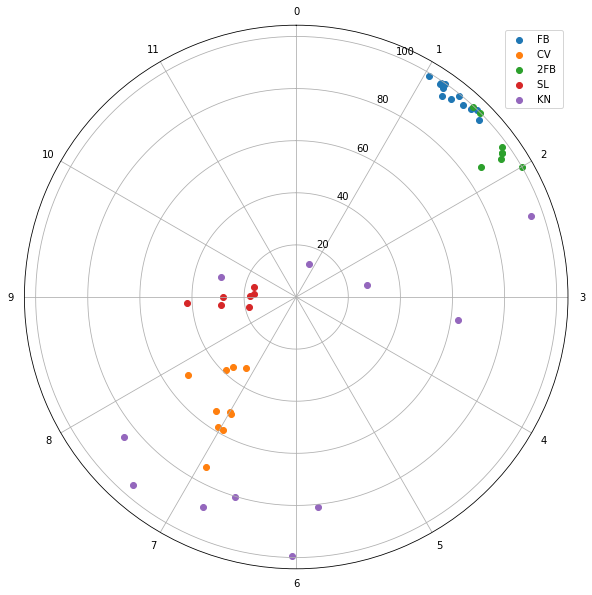

In [87]:
# plot

#set polar axis and size of the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))

# adjust the axes to resemble a clockface
# make 0 hour be on top
ax.set_theta_offset(np.pi/2.0)
# Make the labels go clockwise
ax.set_theta_direction(-1) 
# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax.set_xticklabels(range(12))

# plot each pitch separately
for pitch_type in df.pitch_type.unique():
    plot_df = df.query(f"pitch_type == '{pitch_type}'")
    ax.scatter(plot_df["spin_rad"], plot_df["spin_eff"], label=pitch_type)
  
# add legend
plt.legend()

# show plot
plt.show()